# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Yogi Dharma Susanto
- **Email:** itsgoy21@gmail.com
- **ID Dicoding:** itsgoy21

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan antara pelanggan berlangganan dan kasual dari tahun 2011 sampai 2012?

- Kapan musim dan cuaca yang membuat bisnis rental sepeda itu naik?

## Import Semua Packages/Library yang Digunakan

In [1]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/bike-sharing-dataset")

print("Path to dataset files:", path)

100%|██████████| 286k/286k [00:00<00:00, 50.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/lakshmi25npathi/bike-sharing-dataset/versions/1


In [3]:
print(os.listdir(path))

['day.csv', 'hour.csv', 'Readme.txt']


In [4]:
# Load data kedalam dataframe
file_path = os.path.join(path, "hour.csv")
df = pd.read_csv(file_path)
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Periode waktu dari januari 2011 sampai desember 2012 tren waktu yang panjang cukup untuk melihat pertumbuhan bisnis rental sepeda.
- weekday dan weekend menjadi data yang relevan untuk melihat perbedaan pertumbuhan bisnis antara hari kerja dan hari libur
- Cuaca musiman dengan temperatur menjadi pengaruh peminat bisnis rental sepeda.

In [5]:
df.to_csv('hour.csv', index=False)

### Assessing Data

In [6]:
# info data yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
# nilai agregasi dari tiap fitur
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
#Total nilai null
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [9]:
# Total nilai dulikat
df.duplicated().sum()

np.int64(0)

**Insight:**
- kolom tanggal pada dataframe bertype data object ini bisa diganti menjadi type data date.
- tidak ada data yang mempunyai baris duplikat dan nilai null.
- nilai pada data semua akurat.


### Cleaning Data

In [10]:
# mengganti type data tanggal dari object menjadi datetime
df['dteday'] = pd.to_datetime(df['dteday'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- mengubah tipe data object menjadi datetime pada kolom date untuk penggunaan data visual nanti

## Exploratory Data Analysis (EDA)

### Explore ...

In [11]:
'''
Mengubah value di kolom numerik menjadi kategori
berdasarkan informasi dari sumber agar data menjadi informatif
'''
season = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

yr = {
    0: '2011',
    1: '2012'
}

mnth = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

weekday = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

holiday = {
    0: 'No',
    1: 'Yes'
}

workingday = {
    0: 'No',
    1: 'Yes'
}
weathersit = {
    1: 'Clear, Few clouds, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
}

df_cat = df.copy()
df_cat['season'] = df_cat['season'].map(season)
df_cat['yr'] = df_cat['yr'].map(yr)
df_cat['mnth'] = df_cat['mnth'].map(mnth)
df_cat['holiday'] = df_cat['holiday'].map(holiday)
df_cat['weekday'] = df_cat['weekday'].map(weekday)
df_cat['workingday'] = df_cat['workingday'].map(workingday)
df_cat['weathersit'] = df_cat['weathersit'].map(weathersit)
df_cat.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,No,Sunday,No,"Clear, Few clouds, Partly cloudy",0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,No,Sunday,No,"Clear, Few clouds, Partly cloudy",0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,No,Sunday,No,"Clear, Few clouds, Partly cloudy",0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,No,Sunday,No,"Clear, Few clouds, Partly cloudy",0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,No,Sunday,No,"Clear, Few clouds, Partly cloudy",0.24,0.2879,0.75,0.0,0,1,1


In [12]:
# melihat jumlah pelanggan tiap tahun
cas_reg_year = df_cat.groupby(by='yr')[['casual', 'registered']].sum()
cas_reg_year

,casual,registered
yr,,
2011,247252,995851
2012,372765,1676811


In [13]:
# melihat jumlah pelanggan kasual tahun 2011 tiap bulan
cas_month = df_cat[df_cat['yr'] == '2011'] \
    .groupby('mnth')['casual'] \
    .sum() \
    .sort_values()
cas_month

,casual
mnth,
January,3073
February,6242
December,8448
March,12826
November,15594
April,22346
October,25222
September,26545
August,28842


In [14]:
# melihat jumlah pelanggan kasual tahun 2012 tiap bulan
df_cat[df_cat['yr'] == '2012'] \
    .groupby('mnth')['casual'] \
    .sum() \
    .sort_values()


,casual
mnth,
February,8721
January,8969
December,13245
November,21009
March,31618
October,34538
April,38456
July,41705
August,43197


In [15]:
# melihat jumlah pelanggan registered tahun 2011 tiap bulan

df_cat[df_cat['yr'] == '2011'] \
    .groupby('mnth')['registered'] \
    .sum() \
    .sort_values()


,registered
mnth,
January,35116
February,41973
March,51219
April,72524
December,78875
November,86573
October,98289
September,100873
May,104771


In [16]:
# melihat jumlah pelanggan registered tahun 2012 tiap bulan
df_cat[df_cat['yr'] == '2012'] \
    .groupby('mnth')['registered'] \
    .sum() \
    .sort_values()


,registered
mnth,
January,87775
February,94416
December,110468
November,131655
March,133257
April,135768
May,151630
June,159536
July,161902


In [17]:
# melihat jumlah pelanggan tiap musim
temp_season = df_cat.groupby(['season', 'yr']).agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'temp' : 'mean',
    'windspeed' : 'mean'
})
temp_season

casual  registered      temp  windspeed
season yr                                           
Fall   2011   95450      324200  0.701339   0.176337
       2012  130641      510838  0.711445   0.166882
Spring 2011   21425      128575  0.275348   0.215586
       2012   39197      282151  0.321785   0.214652
Summer 2011   77564      269752  0.534607   0.205680
       2012  125958      445315  0.554705   0.201144
Winter 2011   52813      273324  0.426354   0.168109
       2012   76969      438507  0.419867   0.173575

**Insight:**
- Pengaruh dari tahun 2011 sampai 2012 cukup signifikan dengan kenaikan sekitar 50% untuk casual dan sekitar 40% untuk berlangganan.
- Pada musim Fall/gugur pelanggan lebih banyak dibanding musim lainnya temperatur udara berada di sekitar 0.7 untuk temp, ini temperatur paling tinggi dengan kecepatan angin yang sangat rendah dengan nilai 0.17 dibanding musim lainnya.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingan antara pengguna berlangganan dan kasual dari tahun 2011 sampai 2012?

<Figure size 700x500 with 0 Axes>

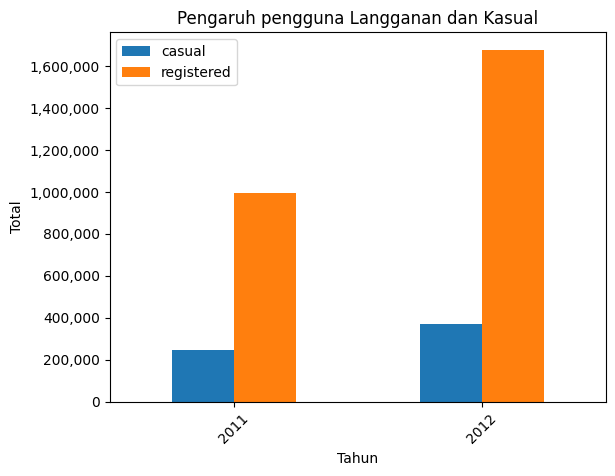

In [18]:
plt.figure(figsize=(7, 5))
cas_reg_year.plot(kind='bar')
plt.title("Pengaruh pengguna Langganan dan Kasual")
plt.xlabel('Tahun')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

**Insight:**
- Perbandingan pelanggan registered jauh naik signifikan dibanding pengguna casual.

### Pertanyaan 2: Kapan musim dan cuaca yang membuat bisnis rental sepeda itu naik?

<Axes: xlabel='season', ylabel='total'>

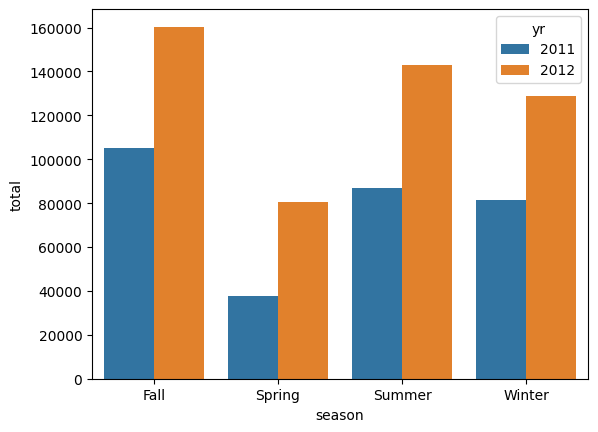

In [19]:
seas_dem = temp_season.reset_index()

long_season = seas_dem.melt(
    id_vars=['season', 'yr'],
    var_name='customer',
    value_name='total'
)

sns.barplot(
    data=long_season,
    x='season',
    y='total',
    hue='yr',
    errorbar=None
)



**Insight:**
- Permintaan rental sepeda sangat dipengaruhi oleh musim, dengan puncak pada Fall dan Summer.

## Analisis Lanjutan (Opsional)

In [20]:
# bining data temp
temp_bin = pd.cut(df_cat['temp'], labels=['dingin', 'sejuk', 'panas'], bins=[0, 0.3, 0.6, 1])
df_cat['temp_bin'] = temp_bin

# bining data jam
hour_bin = pd.cut(df_cat['hr'], labels=['subuh', 'pagi', 'siang', 'sore', 'malam'], bins=[-1, 6, 10, 16, 18, 23], include_lowest=True)
df_cat['hour_bin'] = hour_bin

# bining data cnt total customer
cnt_bin = pd.cut(df_cat['cnt'], labels=['rendah', 'sedang', 'tinggi'], bins=[0, 1000, 5000, 10000], include_lowest=True)
df_cat['cnt_bin'] = cnt_bin

df_cat.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_bin,hour_bin,cnt_bin
0,1,2011-01-01,Spring,2011,January,0,No,Sunday,No,"Clear, Few clouds, Partly cloudy",0.24,0.2879,0.81,0.0,3,13,16,dingin,subuh,rendah
1,2,2011-01-01,Spring,2011,January,1,No,Sunday,No,"Clear, Few clouds, Partly cloudy",0.22,0.2727,0.80,0.0,8,32,40,dingin,subuh,rendah
2,3,2011-01-01,Spring,2011,January,2,No,Sunday,No,"Clear, Few clouds, Partly cloudy",0.22,0.2727,0.80,0.0,5,27,32,dingin,subuh,rendah
3,4,2011-01-01,Spring,2011,January,3,No,Sunday,No,"Clear, Few clouds, Partly cloudy",0.24,0.2879,0.75,0.0,3,10,13,dingin,subuh,rendah
4,5,2011-01-01,Spring,2011,January,4,No,Sunday,No,"Clear, Few clouds, Partly cloudy",0.24,0.2879,0.75,0.0,0,1,1,dingin,subuh,rendah


In [21]:
df_cat.to_csv('hour_analysis.csv', index=False)

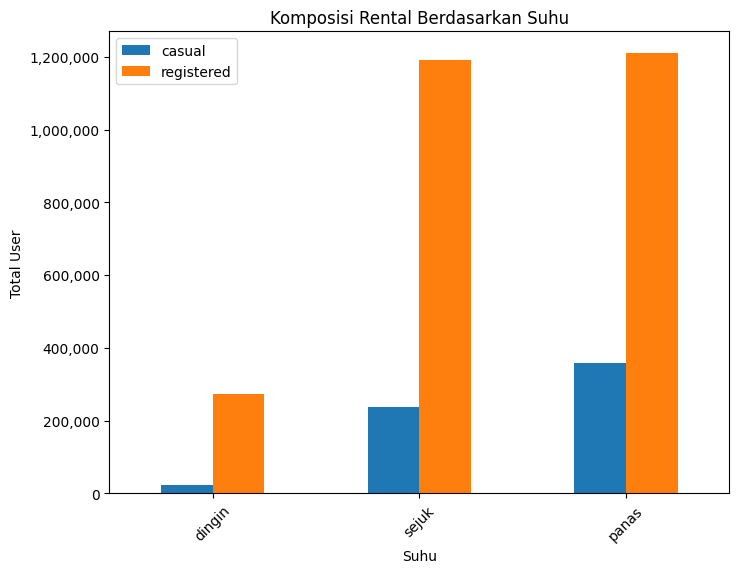

In [22]:
temp_cus = (df_cat.groupby(by='temp_bin', observed=False)[['casual', 'registered']].sum())
temp_cus.plot(
    y=['casual', 'registered'],
    kind='bar',
    figsize=(8,6)
    )

plt.title('Komposisi Rental Berdasarkan Suhu')
plt.xlabel('Suhu')
plt.ylabel('Total User')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

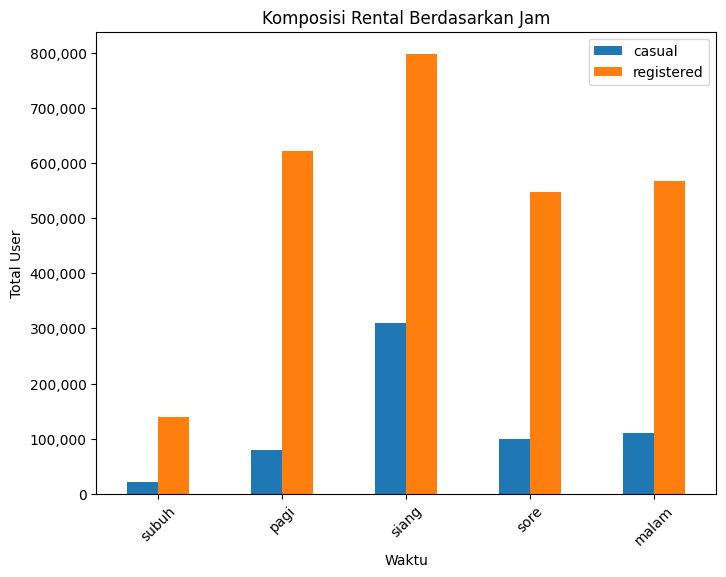

In [23]:
hour_cus = (df_cat.groupby(by='hour_bin', observed=False)[['casual', 'registered']].sum())
hour_cus.plot(
    y=['casual', 'registered'],
    kind='bar',
    figsize=(8,6)
    )

plt.title('Komposisi Rental Berdasarkan Jam')
plt.xlabel('Waktu')
plt.ylabel('Total User')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

## Conclusion

- Pelanggan registered mengalami kenaikan yang signifikan dari tahun 2011 ke tahun 2012 dari pada pelanggan kasual.
- Puncak pelanggan terbanyak di alami pada saat musim fall dan summer.
- Pengguna registered mendominasi rental di semua suhu, sementara kenaikan suhu secara signifikan meningkatkan permintaan, terutama dari pengguna kasual.

## Rekomendasi

- Optimalkan pada pelanggan Registered dengan memberikan diskon atau perpanjangan langganan secara gratis. Untuk customer kasual memberikan upgrade untuk ke registered seperti diskon upgrade membership bulanan.
-  Musim Fall mempunyai high demand yang tinggi bisa menambahkan kapasitas sepeda dan harga normal/tetap. Untuk musim Spring bisa memperikan promo bundling semisal (beli 5 tiket sepeda promo 25%)